In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
team_game_file_path = os.path.join('..', 'raw_data', 'team_game_level_data.csv')
team_game_df = pd.read_csv(team_game_file_path)
team_game_df

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav


In [213]:
def upset_bar_chart(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    upsets_groupby = winner_df[['game_id', 'upset', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                   'upset': 'sum'})
    upsets_df.columns = ['total_games', 'num_upsets']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    tick_loc = range(len(upsets_df[column]))
    plt.figure(figsize=(15,5))
    plt.bar(tick_loc, upsets_df['upset_perc'],
            width=0.2,align='center')
    plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()
    ##return winner_df
    

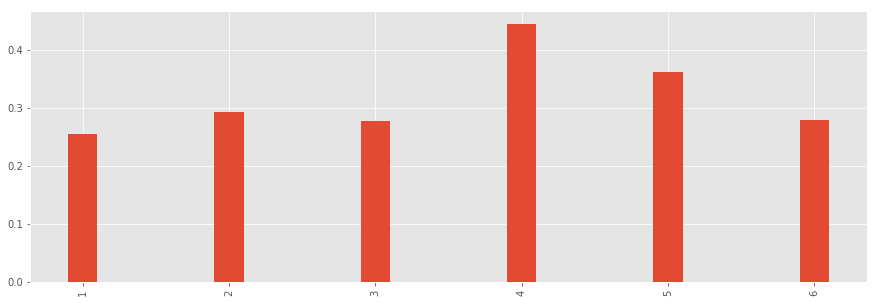

In [214]:
## percentage of upsets by round
upset_bar_chart(team_game_df, 'round') 

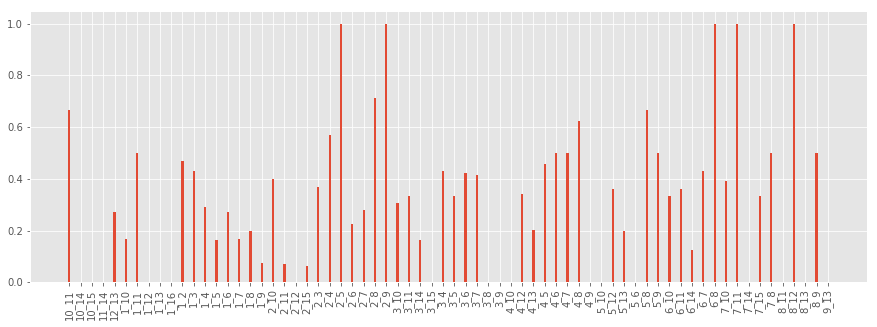

In [215]:
## percentage of upsets by matchup
upset_bar_chart(team_game_df, 'matchup')

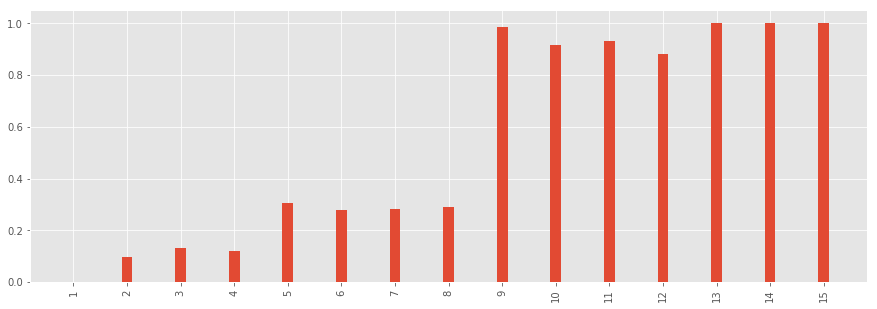

In [216]:
## percentage of upsets by seed
upset_bar_chart(team_game_df, 'seed')

In [217]:
def upset_scatter(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    upsets_groupby = winner_df[['game_id', 'upset', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                   'upset': 'sum'})
    upsets_df.columns = ['total_games', 'num_upsets']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    tick_loc = range(len(upsets_df[column]))
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.scatter(tick_loc, upsets_df['upset_perc'], s=upsets_df['total_games'])
    plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()
    ##return winner_df
    

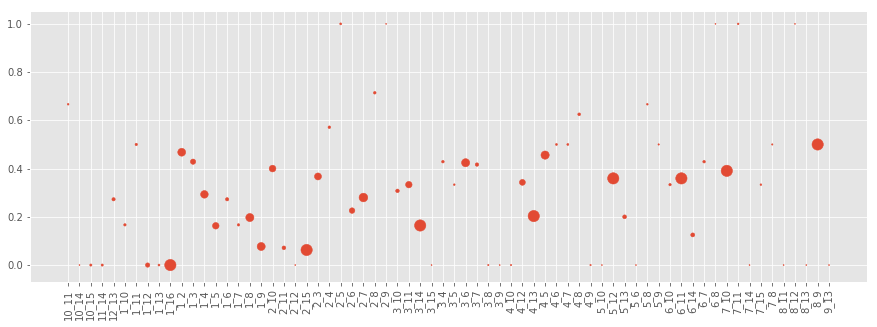

In [212]:
upset_scatter(team_game_df, 'matchup')

In [244]:
def upset_scatter_norm(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    winner_df[''] = ''
    for index, row in winner_df.iterrows():
        high_seed = min([winner_df.loc[index, 'seed'], winner_df.loc[index, 'opponent_seed']])
        low_seed = max([winner_df.loc[index, 'seed'], winner_df.loc[index, 'opponent_seed']])
        winner_df.loc[index, 'seed_based_expected_upset_perc'] = high_seed/low_seed
    upsets_groupby = winner_df[['game_id', 'upset', 'seed_based_expected_upset_perc', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                    'upset': 'sum',
                                    'seed_based_expected_upset_perc': 'mean'})
    upsets_df.columns = ['total_games', 'num_upsets', 'seed_based_expected_upset_perc']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    tick_loc = range(len(upsets_df[column]))
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.scatter(tick_loc, upsets_df['seed_based_expected_upset_perc'], s=upsets_df['total_games'])
    plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()

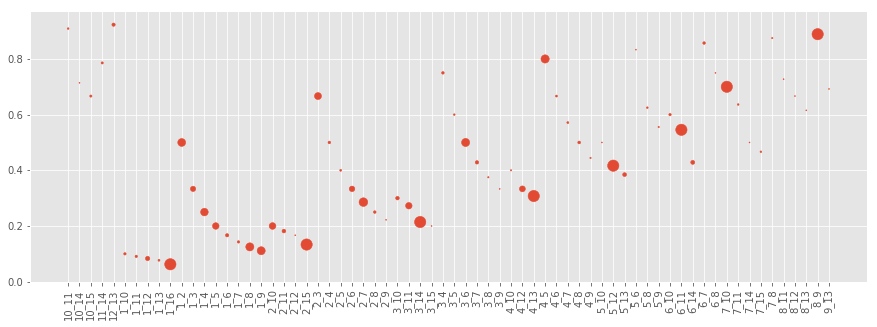

In [245]:
upset_scatter_norm(team_game_df, 'matchup')

In [262]:
def upset_scatter_norm(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    winner_df[''] = ''
    for index, row in winner_df.iterrows():
        high_seed = min([winner_df.loc[index, 'seed'], winner_df.loc[index, 'opponent_seed']])
        low_seed = max([winner_df.loc[index, 'seed'], winner_df.loc[index, 'opponent_seed']])
        winner_df.loc[index, 'seed_based_expected_upset_perc'] = high_seed/(high_seed + low_seed)
    upsets_groupby = winner_df[['game_id', 'upset', 'seed_based_expected_upset_perc', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                    'upset': 'sum',
                                    'seed_based_expected_upset_perc': 'mean'})
    upsets_df.columns = ['total_games', 'num_upsets', 'seed_based_expected_upset_perc']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    tick_loc = range(len(upsets_df[column]))
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.scatter(upsets_df['upset_perc'], upsets_df['seed_based_expected_upset_perc'], s=upsets_df['total_games'])
    plt.xlabel = 'upset_perc'
    plt.ylabel = 'seed_based_expected_upset_perc'
    ##plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()

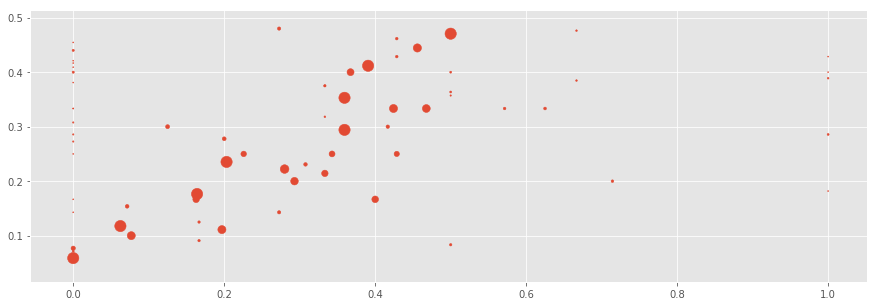

In [263]:
upset_scatter_norm(team_game_df, 'matchup')